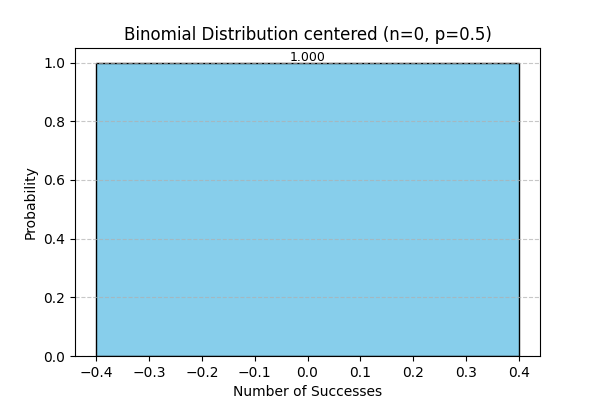

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 0
        # number of trials
p = 0.5      # probability of success

# Support: possible number of successes
x = np.arange(0, n + 1)

# PMF: probability mass function
pmf = binom.pmf(x, n, p)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(x-n*p, pmf, color='skyblue', edgecolor='black')
plt.title(f'Binomial Distribution centered (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with probability values
for xi, yi in zip(x, pmf):
    plt.text(xi-n*p, yi + 0.005, f'{yi:.3f}', ha='center', fontsize=9)

plt.show()


In [10]:
import numpy as np
import pandas as pd

# load
df = pd.read_csv('/home/danielemdn/Documents/repositories/ABM_Uni_v3/mev_out/sandwich_attacks_tidy_None.csv')

# fee fraction and keep r = 1 - f
fee_bps = df.get('fee_bps', pd.Series(5.0, index=df.index)).astype(float)
f = fee_bps / 10_000.0
r = 1.0 - f

# decimals if present; otherwise default (common: token0=USDC 6, token1=WETH 18)
dec0 = (df.get('token0_decimals') or df.get('dec0') or pd.Series(6, index=df.index)).astype(int)
dec1 = (df.get('token1_decimals') or df.get('dec1') or pd.Series(18, index=df.index)).astype(int)

# pool deltas (absolute magnitudes)
fa0 = df['front_a0'].astype(float).abs().to_numpy()
ba0 = df['back_a0'].astype(float).abs().to_numpy()
fa1 = df['front_a1'].astype(float).abs().to_numpy()
ba1 = df['back_a1'].astype(float).abs().to_numpy()

front_dir = df['front_dir'].astype(str).to_numpy()
is_x2y = (front_dir == 'swap_x2y')

# Convert pool deltas -> trader-side inputs for the back leg (divide by r),
# and scale to token units using decimals.
# For x→y: compare token1:  back_a1 / r  vs  front_a1
# For y→x: compare token0:  back_a0 / r  vs  front_a0
diff_token1 = (ba1 / r) / (10.0 ** dec1) - (fa1 / (10.0 ** dec1))
diff_token0 = (ba0 / r) / (10.0 ** dec0) - (fa0 / (10.0 ** dec0))

# pick the right diff per row
diff_tokens = np.where(is_x2y, diff_token1, diff_token0)

# tolerances: a small relative tolerance + a decimals-based absolute dust
rtol = 2e-3
atol_token1 = 5.0 * (10.0 ** (-dec1))    # e.g., ~5e-18 for 18-dec tokens
atol_token0 = 5.0 * (10.0 ** (-dec0))    # e.g., ~5e-6 for 6-dec tokens
atol = np.where(is_x2y, atol_token1, atol_token0)

is_self_funded = np.isclose(diff_tokens, 0.0, rtol=rtol, atol=atol)

filtered_df = df[is_self_funded].copy()
filtered_df.to_csv('/home/danielemdn/Documents/repositories/ABM_Uni_v3/mev_out/sandwich_attacks_tidy_self_funded_None.csv', index=False)


In [17]:
250000/2000

125.0

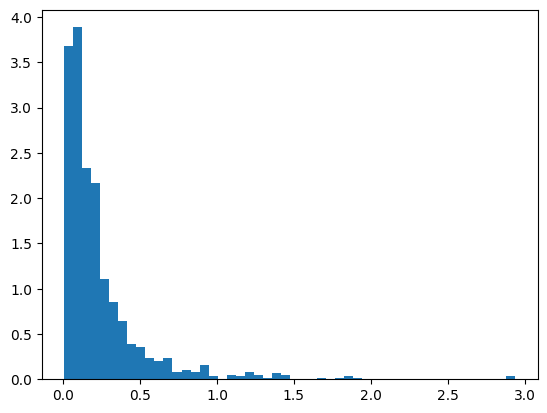

In [16]:
x = [np.random.lognormal(mean=-2.0, sigma=1.0) for _ in range(1000)]

plt.hist(x, bins=50, density=True)
# plt.yscale('log')
# plt.xlabel('Value')
# plt.ylabel('Density (log scale)')
# plt.title('Histogram of Log-Normal Distribution (log scale)')
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [2]:
import pandas as pd
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
df = pd.read_csv('/home/danielemdn/Documents/repositories/ABM_Uni_v3/data/usdc_weth_05.csv')
df

/tmp/ipykernel_361385/3420792686.py:5: DtypeWarning: Columns (14,16,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/danielemdn/Documents/repositories/ABM_Uni_v3/data/usdc_weth_05.csv')


,eventType,blockNumber,logIndex,timestamp,transactionHash,gasUsed,gasPrice,effectiveGasPrice,origin,sender,...,tick_before,x_before,y_before,L_after,sqrt_after,tick_after,x_after,y_after,affectsActive,deltaL_applied
0,Swap,16308193,144,1672531247,0x94ddda3238c96bbb12dd3b2b36e84c04ee7824fcaff9...,364517.0,1.999335e+10,1.999335e+10,0x7a57533Bccd4C578F42580eaaA0fd6A5634473d3,0x53222470CdcfB8081C0E3a50fd106f0D69e63F20,...,205456,1382214877842281,1156091754413675000920024,39974582212968359597,2291340004214720379120476440275511,205456,1382209837991415,1156095969786673572989174,NaN,NaN
1,Swap,16308193,307,1672531247,0xa7235b63f26b3e60480cfdf7a2dfda59748e8b01f2b9...,249637.0,1.949335e+10,1.949335e+10,0xc4cC364706Fe781FB00a47BaDb297Af36A482Cc1,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,...,205456,1382209837991415,1156095969786673572989174,39974582212968359597,2291339964551493463877780626424282,205456,1382209861917547,1156095949774586016755248,NaN,NaN
2,Swap,16308195,41,1672531271,0xc32c1a42d18914a139224fb015d357f952da300b322f...,261522.0,2.212594e+10,2.212594e+10,0x80681fa00Ea7e84CdeB631cE96a756E33ED67d56,0x1111111254EEB25477B68fb85Ed929f73A960582,...,205456,1382209861917547,1156095949774586016755248,39974582212968359597,2291339840401635396257026212333731,205456,1382209936808733,1156095887134755045553015,NaN,NaN
3,Mint,16308196,4,1672531283,0xd206569ae3c6d66f294304fd1e8391731febc20b4c2d...,514483.0,1.968192e+10,1.968192e+10,0x065e3DbaFCb2C26A978720f9eB4Bce6aD9D644a1,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,...,205456,1382209936808733,1156095887134755045553015,1437495831953515783853,2291339840401635396257026212333731,205456,49704610106036316,41573493132235227728708176,True,1.397521e+21
4,Swap,16308196,12,1672531283,0xbce4e3e514d36b4628d9d404b9914b18f06061520b74...,121338.0,2.118192e+10,2.118192e+10,0xea7c3a066E343DA79d9381F02B7a85879999E039,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,...,205456,49704610106036316,41573493132235227728708176,1437495831953515668937,2291342580471075253351994683067231,205456,49704550667485162,41573542847365224405248427,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973739,Swap,18907186,94,1704046595,0xf65749270624f075a23031d2fb495332673b09bf396d...,166328.0,1.631655e+10,1.631655e+10,0xEB77c39D4F38226C59208B9b9de4aC82C784ffF1,0x3fC91A3afd70395Cd496C647d5a6CC9D4B2b7FAD,...,198936,717307684341611,312579485605063839758363,14973832742222690304,1653892004131901366199577124429027,198936,717307569658954,312579535580063839758366,NaN,NaN
1973740,Swap,18907186,118,1704046595,0xddae74fba1e6f5e7384385e6051f1d6a1e390df527e9...,451652.0,1.631655e+10,1.631655e+10,NaN,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,...,198936,717307569658954,312579535580063839758366,14973832742222690304,1653896825197822242505220641759607,198936,717305478726179,312580446743877911988846,NaN,NaN
1973741,Swap,18907186,141,1704046595,0xe85a419bb720a08f4daa80dbfd4175732876bdf5d341...,224010.0,1.629655e+10,1.629655e+10,0xa6174B0e515aC67EfEaF0484944e90c9B4161D29,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,...,198936,717305478726179,312580446743877911988846,14973832742222690304,1653897953091937499434033077255026,198936,717304989551725,312580659911737633004024,NaN,NaN
1973742,Swap,18907189,25,1704046631,0x33d4c4f2553f7f1428be29c04e6f563a00c10866e101...,289975.0,1.627458e+10,1.627458e+10,0x9b7e7f21d98f21C0354035798C40E9040e25787f,0xE592427A0AEce92De3Edee1F18E0157C05861564,...,198936,717304989551725,312580659911737633004024,14973832742222690304,1653884427190876056164084636916118,198936,717310855860253,312578103565941459335388,NaN,NaN


In [14]:
lp_events = df[df['eventType'].isin(['Mint', 'Burn'])]
lp_events

,eventType,blockNumber,logIndex,timestamp,transactionHash,gasUsed,gasPrice,effectiveGasPrice,origin,sender,...,tick_before,x_before,y_before,L_after,sqrt_after,tick_after,x_after,y_after,affectsActive,deltaL_applied
3,Mint,16308196,4,1672531283,0xd206569ae3c6d66f294304fd1e8391731febc20b4c2d...,514483.0,1.968192e+10,1.968192e+10,0x065e3DbaFCb2C26A978720f9eB4Bce6aD9D644a1,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,...,205456,1382209936808733,1156095887134755045553015,1437495831953515783853,2291339840401635396257026212333731,205456,49704610106036316,41573493132235227728708176,True,1.397521e+21
5,Burn,16308196,13,1672531283,0x1d58dd9000c4451a135ef1b4e0c74e6faa874b5f9449...,250955.0,1.968192e+10,1.968192e+10,0x065e3DbaFCb2C26A978720f9eB4Bce6aD9D644a1,NaN,...,205456,49704550667485162,41573542847365224405248427,39974582212968244681,2291342580471075253351994683067231,205456,1382208283912632,1156097269637230851137915,True,-1.397521e+21
17,Mint,16308206,26,1672531403,0xf635ce83612bb2fb5d36c8ac2a204f7450e2d33b160e...,439953.0,1.389197e+10,1.389197e+10,0x479Bc00624e58398f4Cf59D78884d12Fb515790A,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,...,205459,1382039717874227,1156238277695279327218719,2089330758831012619949,2291622053294058200409805196763890,205459,72234353247199089,60432506467643095841338578,True,2.049356e+21
19,Burn,16308206,35,1672531403,0x0c846cc998693d328b51b76a94af2be25366a838cf1e...,236308.0,1.389197e+10,1.389197e+10,0x479Bc00624e58398f4Cf59D78884d12Fb515790A,NaN,...,205459,72234233778189967,60432606417643092105355545,39974582212968230433,2291625843433465199494127987375825,205459,1382037432107018,1156240190010726507033962,True,-2.049356e+21
87,Mint,16308301,4,1672532555,0x1bc3d9a79c899043997dbe32bc4899822bd625f3b5a7...,439985.0,1.298891e+10,1.298891e+10,0x479Bc00624e58398f4Cf59D78884d12Fb515790A,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,...,205461,1139591419629001,953607706561206521009390,1623466345797018506410,2291869444126990420813239709861440,205461,56121981909069900,46962756593412053462689248,True,1.590501e+21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973572,Mint,18906973,205,1704044039,0x46277bf2ef656ff36dae466c655fba36d843c7196049...,453347.0,1.680211e+10,1.680211e+10,NaN,0xC36442b4a4522E871399CD717aBDD847Ab11FE88,...,198946,718121060695806,313248653256664219049771,15000919330964972000,1654723208386923804062688454022790,198946,718244156239063,313302348260553619566856,True,2.570917e+15
1973585,Burn,18906988,184,1704044219,0x2cf7659b66752b5e9bd23217bd0579b283766b041114...,243288.0,1.501905e+10,1.501905e+10,0x1C15F6D1235a847116D709d8E3Cd1bC4bbA2bB4f,NaN,...,198940,718435201284526,313219035442278259557859,15000919330964971520,1654283187254871213218127080932514,198940,718435201284526,313219035442278259557859,False,0.000000e+00
1973630,Mint,18907034,2,1704044771,0x535b1f077d5ef5d51e5e3ac9d3ff73bc406b5fc710ee...,246172.0,1.343959e+10,1.343959e+10,0x6046945C5B5eF5933b8E73a98A6AD7bF3e031df7,0x9a5F2E0DB22Ff289d0cc40ef654A19a5b012d8aA,...,198933,717471867349743,312565534848153523686819,954219563860397428736,1653665590671617844966634448599647,198933,45717261764585351,19916656004959344775172564,True,9.392444e+20
1973632,Burn,18907034,7,1704044771,0x1a5e7da876fa577f902cda297b870a9176916704d6bb...,164754.0,1.343959e+10,1.343959e+10,0x6046945C5B5eF5933b8E73a98A6AD7bF3e031df7,NaN,...,198933,45717361714585349,19916612461988073627358157,14975212117251457024,1653661975330102306523304180346744,198933,717473435932600,312564851498894695340936,True,-9.392444e+20


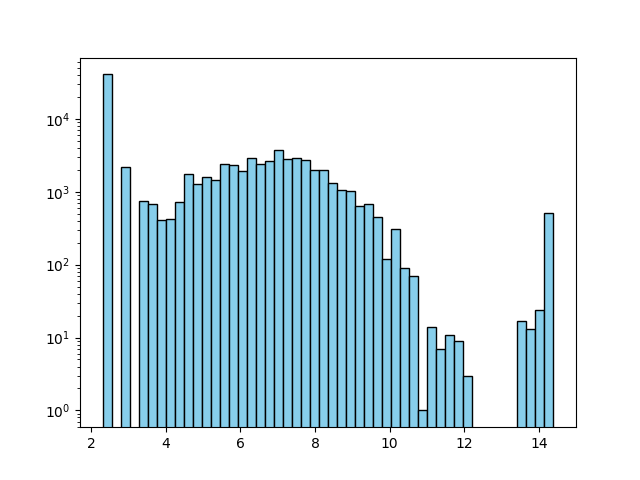

In [16]:
tick_ranges = lp_events['tickUpper'] - lp_events['tickLower']

plt.figure()
plt.hist(np.log(tick_ranges), bins=50, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.show()

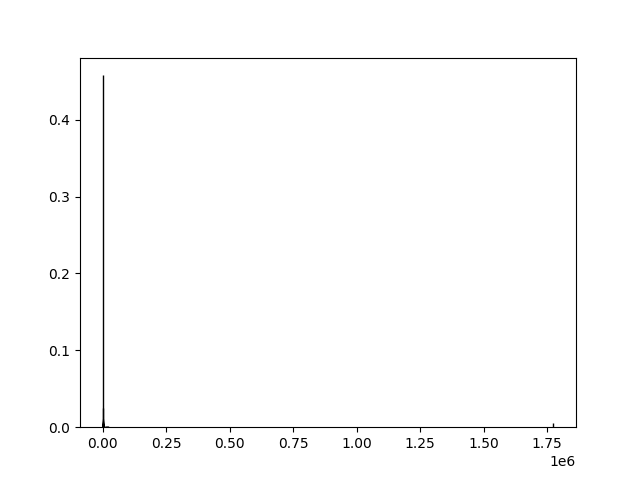

Tick Range: 10.0, Count: 40932, Frequency: 0.4580
Tick Range: 20.0, Count: 2182, Frequency: 0.0244
Tick Range: 30.0, Count: 749, Frequency: 0.0084
Tick Range: 40.0, Count: 674, Frequency: 0.0075
Tick Range: 50.0, Count: 412, Frequency: 0.0046
Tick Range: 60.0, Count: 426, Frequency: 0.0048
Tick Range: 70.0, Count: 344, Frequency: 0.0038
Tick Range: 80.0, Count: 385, Frequency: 0.0043
Tick Range: 90.0, Count: 389, Frequency: 0.0044
Tick Range: 100.0, Count: 903, Frequency: 0.0101
Tick Range: 110.0, Count: 461, Frequency: 0.0052
Tick Range: 120.0, Count: 449, Frequency: 0.0050
Tick Range: 130.0, Count: 441, Frequency: 0.0049
Tick Range: 140.0, Count: 383, Frequency: 0.0043
Tick Range: 150.0, Count: 320, Frequency: 0.0036
Tick Range: 160.0, Count: 615, Frequency: 0.0069
Tick Range: 170.0, Count: 365, Frequency: 0.0041
Tick Range: 180.0, Count: 299, Frequency: 0.0033
Tick Range: 190.0, Count: 313, Frequency: 0.0035
Tick Range: 200.0, Count: 310, Frequency: 0.0035
Tick Range: 210.0, Count: 

In [36]:
values, counts = np.unique(tick_ranges, return_counts=True)

%matplotlib widget
plt.figure()
plt.bar(values, counts/np.sum(counts), color='skyblue', edgecolor='black')
# plt.yscale('log')
plt.show() 

for v,c in zip(values, counts):
    print(f'Tick Range: {v}, Count: {c}, Frequency: {c/len(tick_ranges):.4f}')

In [3]:
swaps = df[df['eventType'] == 'Swap']

In [4]:
swaps

,eventType,blockNumber,logIndex,timestamp,transactionHash,gasUsed,gasPrice,effectiveGasPrice,origin,sender,...,tick_before,x_before,y_before,L_after,sqrt_after,tick_after,x_after,y_after,affectsActive,deltaL_applied
0,Swap,16308193,144,1672531247,0x94ddda3238c96bbb12dd3b2b36e84c04ee7824fcaff9...,364517.0,1.999335e+10,1.999335e+10,0x7a57533Bccd4C578F42580eaaA0fd6A5634473d3,0x53222470CdcfB8081C0E3a50fd106f0D69e63F20,...,205456,1382214877842281,1156091754413675000920024,39974582212968359597,2291340004214720379120476440275511,205456,1382209837991415,1156095969786673572989174,NaN,NaN
1,Swap,16308193,307,1672531247,0xa7235b63f26b3e60480cfdf7a2dfda59748e8b01f2b9...,249637.0,1.949335e+10,1.949335e+10,0xc4cC364706Fe781FB00a47BaDb297Af36A482Cc1,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,...,205456,1382209837991415,1156095969786673572989174,39974582212968359597,2291339964551493463877780626424282,205456,1382209861917547,1156095949774586016755248,NaN,NaN
2,Swap,16308195,41,1672531271,0xc32c1a42d18914a139224fb015d357f952da300b322f...,261522.0,2.212594e+10,2.212594e+10,0x80681fa00Ea7e84CdeB631cE96a756E33ED67d56,0x1111111254EEB25477B68fb85Ed929f73A960582,...,205456,1382209861917547,1156095949774586016755248,39974582212968359597,2291339840401635396257026212333731,205456,1382209936808733,1156095887134755045553015,NaN,NaN
4,Swap,16308196,12,1672531283,0xbce4e3e514d36b4628d9d404b9914b18f06061520b74...,121338.0,2.118192e+10,2.118192e+10,0xea7c3a066E343DA79d9381F02B7a85879999E039,0x68b3465833fb72A70ecDF485E0e4C7bD8665Fc45,...,205456,49704610106036316,41573493132235227728708176,1437495831953515668937,2291342580471075253351994683067231,205456,49704550667485162,41573542847365224405248427,NaN,NaN
6,Swap,16308196,38,1672531283,0xcc63ec3c110d72ed30817a506f61f7f81eb169476631...,210664.0,2.518192e+10,2.518192e+10,0x88f859dB067C45b114897dB6920F3E4A61A5ca66,0x53222470CdcfB8081C0E3a50fd106f0D69e63F20,...,205456,1382208283912632,1156097269637230851137915,39974582212968359597,2291339515188756112337363155211019,205456,1382210132987636,1156095723048544194574108,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973739,Swap,18907186,94,1704046595,0xf65749270624f075a23031d2fb495332673b09bf396d...,166328.0,1.631655e+10,1.631655e+10,0xEB77c39D4F38226C59208B9b9de4aC82C784ffF1,0x3fC91A3afd70395Cd496C647d5a6CC9D4B2b7FAD,...,198936,717307684341611,312579485605063839758363,14973832742222690304,1653892004131901366199577124429027,198936,717307569658954,312579535580063839758366,NaN,NaN
1973740,Swap,18907186,118,1704046595,0xddae74fba1e6f5e7384385e6051f1d6a1e390df527e9...,451652.0,1.631655e+10,1.631655e+10,NaN,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,...,198936,717307569658954,312579535580063839758366,14973832742222690304,1653896825197822242505220641759607,198936,717305478726179,312580446743877911988846,NaN,NaN
1973741,Swap,18907186,141,1704046595,0xe85a419bb720a08f4daa80dbfd4175732876bdf5d341...,224010.0,1.629655e+10,1.629655e+10,0xa6174B0e515aC67EfEaF0484944e90c9B4161D29,0xDef1C0ded9bec7F1a1670819833240f027b25EfF,...,198936,717305478726179,312580446743877911988846,14973832742222690304,1653897953091937499434033077255026,198936,717304989551725,312580659911737633004024,NaN,NaN
1973742,Swap,18907189,25,1704046631,0x33d4c4f2553f7f1428be29c04e6f563a00c10866e101...,289975.0,1.627458e+10,1.627458e+10,0x9b7e7f21d98f21C0354035798C40E9040e25787f,0xE592427A0AEce92De3Edee1F18E0157C05861564,...,198936,717304989551725,312580659911737633004024,14973832742222690304,1653884427190876056164084636916118,198936,717310855860253,312578103565941459335388,NaN,NaN


In [24]:
np.sqrt(1382214877842281/1e18 *1156091754413675000920024/1e6)

np.float64(39974582.21296836)

In [10]:
5039.850865/4.2174817394417

1194.9905598564994

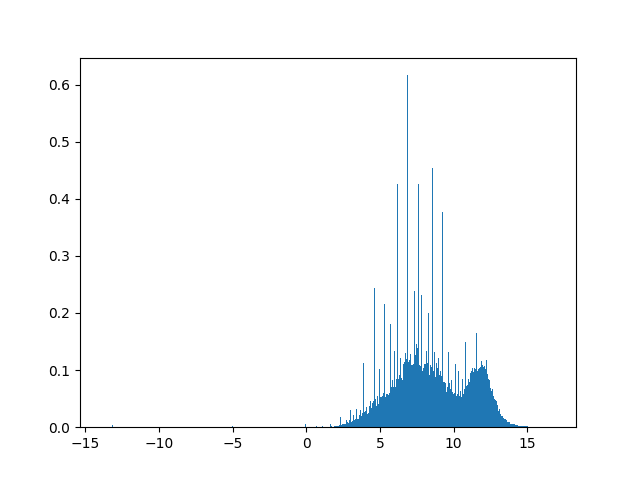

In [12]:
plt.figure()
plt.hist(np.log(swaps[swaps['amount0'] > 0]['amount0']/ 1e6), bins=500, density=True)
plt.show()

/home/danielemdn/miniconda3/envs/amm/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.sparse import csr_matrix, issparse


Weights: [0.22158565 0.77841435]
Means  : [11.69947587  7.37900661]
Stdevs : [0.99654237 1.99211537]
AIC: 4399436.120855926 BIC: 4399494.925356871


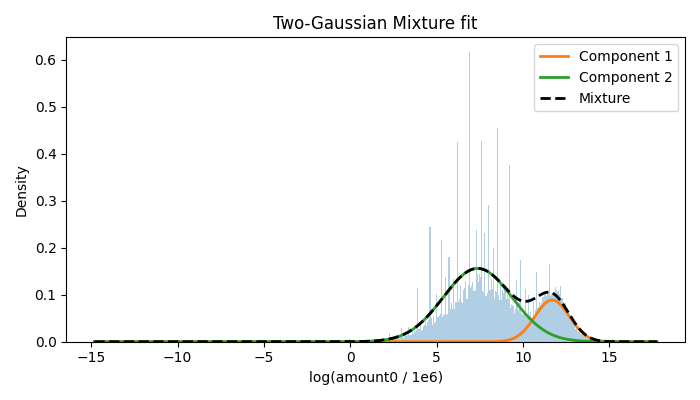

50/50 threshold (log-scale): 10.526995662234654
50/50 threshold (original scale): 37309216349.715614


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 1) Prepare the 1D sample (log-scale, like your histogram)
x = np.log(swaps.loc[swaps['amount0'] > 0, 'amount0'] / 1e6).to_numpy().reshape(-1, 1)

# 2) Fit a 2-component Gaussian Mixture
gmm = GaussianMixture(
    n_components=2,
    covariance_type='full',
    n_init=10,
    random_state=42,
    max_iter=1000
)
gmm.fit(x)

weights = gmm.weights_
means   = gmm.means_.ravel()
stds    = np.sqrt(gmm.covariances_.ravel())

print("Weights:", weights)
print("Means  :", means)
print("Stdevs :", stds)
print("AIC:", gmm.aic(x), "BIC:", gmm.bic(x))

# 3) Plot histogram + component PDFs + mixture PDF
xs = np.linspace(x.min() - 1.0, x.max() + 1.0, 2000).reshape(-1, 1)

def normal_pdf(z, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((z - mu) / sigma) ** 2)

comp_pdfs = [w * normal_pdf(xs, m, s) for w, m, s in zip(weights, means, stds)]
mix_pdf   = np.sum(comp_pdfs, axis=0)

plt.figure(figsize=(7,4))
plt.hist(x[:, 0], bins=500, density=True, alpha=0.35, edgecolor='none')
for i, pdf in enumerate(comp_pdfs):
    plt.plot(xs[:, 0], pdf[:, 0], lw=2, label=f'Component {i+1}')
plt.plot(xs[:, 0], mix_pdf[:, 0], 'k--', lw=2, label='Mixture')
plt.xlabel('log(amount0 / 1e6)')
plt.ylabel('Density')
plt.title('Two-Gaussian Mixture fit')
plt.legend()
plt.tight_layout()
plt.show()

# 4) Responsibilities (soft cluster membership) and a 50/50 threshold
resp = gmm.predict_proba(x)          # shape (N, 2)
labels = resp.argmax(axis=1)         # hard labels if you need them

# Find a posterior 50/50 crossing point (where w1*N1 == w2*N2) on a grid
diff = (weights[0]*normal_pdf(xs, means[0], stds[0]) - 
        weights[1]*normal_pdf(xs, means[1], stds[1]))[:, 0]
cross = np.where(np.diff(np.sign(diff)) != 0)[0]
threshold_log = float(xs[cross[0], 0]) if cross.size else np.nan
threshold_original_scale = np.exp(threshold_log) * 1e6

print("50/50 threshold (log-scale):", threshold_log)
print("50/50 threshold (original scale):", threshold_original_scale)


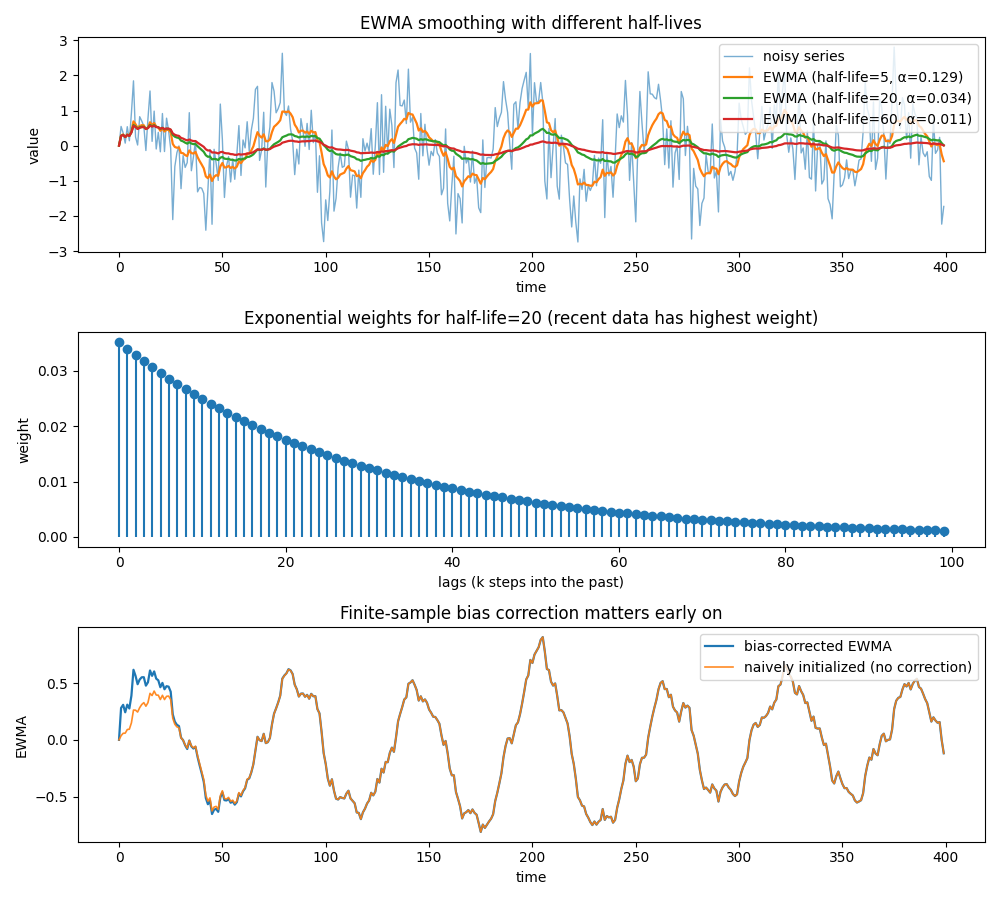

Summary of α and effective sample size (steady state)
half-life	alpha	N_eff ≈ (1+λ)/(1-λ)
        5	0.129	14.5
       20	0.034	57.7
       60	0.011	173.1


In [13]:
"""
EWMA demo: definitions, conversions (alpha, half-life), and visualization.

- EWMA (mean) recursion: s_t = α x_t + (1-α) s_{t-1},  0 < α ≤ 1
- Equivalent (bias-corrected) finite-sample form:
    s_t = [α ∑_{k=0}^{t} (1-α)^k x_{t-k}] / [1 - (1-α)^{t+1}]
- Half-life h: weight decays by 1/2 every h steps ⇒ α = 1 - 2^{-1/h}
- Effective sample size (in steady state): N_eff = (1 + λ)/(1 - λ) where λ = 1-α = decay
"""
from __future__ import annotations

from dataclasses import dataclass
from typing import Optional, Tuple, Iterable

import math
import numpy as np
import matplotlib.pyplot as plt


def alpha_from_halflife(half_life: float) -> float:
    """Convert half-life (in periods) to α.
    Half-life h means the weight drops by 50% every h steps: (1-α)^h = 1/2.
    """
    if half_life <= 0:
        raise ValueError("half_life must be positive")
    return 1.0 - 2.0 ** (-1.0 / half_life)


def halflife_from_alpha(alpha: float) -> float:
    """Convert α to half-life (in periods)."""
    if not (0 < alpha <= 1):
        raise ValueError("alpha must be in (0, 1]")
    if alpha == 1:
        return 0.0
    return math.log(2.0) / -math.log(1.0 - alpha)


def effective_sample_size(alpha: float) -> float:
    """Effective number of equally-weighted observations in steady state.
    Derivation: weights are α λ^k with λ=1-α; n_eff = 1 / ∑ w_k^2 = (1+λ)/(1-λ).
    """
    lam = 1.0 - alpha
    return (1.0 + lam) / (1.0 - lam)


def exp_weights(alpha: float, length: int, normalize: bool = True) -> np.ndarray:
    """Return the last `length` exponential weights [w_0, w_1, ..., w_{length-1}]
    where w_k ∝ (1-α)^k, i.e. k steps into the past.
    If normalize=True, weights sum to 1 over the provided `length` lags.
    """
    if not (0 < alpha <= 1):
        raise ValueError("alpha must be in (0, 1]")
    if length <= 0:
        raise ValueError("length must be positive")
    lam = 1.0 - alpha
    k = np.arange(length, dtype=float)
    w = lam ** k
    if normalize:
        w = w / w.sum()
    return w


def ewma_recursive(
    x: Iterable[float],
    alpha: float,
    init: Optional[float] = None,
    bias_correct: bool = False
) -> np.ndarray:
    """Compute EWMA via the one-line recursion.
    If bias_correct=True, use the finite-sample normalization that makes
    weights sum to 1 at each t by starting from 0 and dividing by (1-λ^{t+1}).
    If bias_correct=False, s_0 is initialized to x_0 (or `init` if provided).
    """
    if not (0 < alpha <= 1):
        raise ValueError("alpha must be in (0, 1]")
    x = np.asarray(list(x), dtype=float)
    n = x.shape[0]
    out = np.empty(n, dtype=float)
    lam = 1.0 - alpha

    if bias_correct:
        s_prev = 0.0  # unbiased form assumes s_{-1} = 0
    else:
        s_prev = x[0] if init is None else float(init)

    for t in range(n):
        s_curr = alpha * x[t] + lam * s_prev
        out[t] = s_curr
        s_prev = s_curr

    if bias_correct:
        denom = 1.0 - lam ** (np.arange(n) + 1.0)
        out = out / denom
    return out


def ewma_convolution(x: Iterable[float], alpha: float) -> np.ndarray:
    """Reference implementation using the explicit (bias-corrected) weights."""
    x = np.asarray(list(x), dtype=float)
    lam = 1.0 - alpha
    out = np.empty_like(x)
    for t in range(x.size):
        k = np.arange(t + 1, dtype=float)
        w = alpha * (lam ** k)            # unnormalized geometric weights
        out[t] = (w[::-1] @ x[:t + 1]) / (1.0 - lam ** (t + 1))  # normalize
    return out


def demo() -> None:
    # ------------------ Synthetic signal ------------------
    rng = np.random.default_rng(7)
    n = 400
    t = np.arange(n)
    signal = np.sin(2 * np.pi * t / 60.0) + 0.5 * np.sin(2 * np.pi * t / 15.0)
    x = signal + 0.8 * rng.standard_normal(n)

    # ------------------ Three EWMAs ------------------
    half_lives = [5, 20, 60]
    alphas = [alpha_from_halflife(h) for h in half_lives]
    smoothed = [ewma_recursive(x, a, bias_correct=True) for a in alphas]

    # Sanity check: recursive vs convolution should match (bias-corrected)
    for a in alphas:
        s_rec = ewma_recursive(x, a, bias_correct=True)
        s_conv = ewma_convolution(x, a)
        assert np.allclose(s_rec, s_conv, atol=1e-10)

    # ------------------ Plot: raw + EWMAs ------------------
    fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=False)
    ax = axs[0]
    ax.plot(t, x, label="noisy series", linewidth=1.0, alpha=0.6)
    for h, a, s in zip(half_lives, alphas, smoothed):
        ax.plot(t, s, label=f"EWMA (half-life={h}, α={a:.3f})", linewidth=1.6)
    ax.set_title("EWMA smoothing with different half-lives")
    ax.set_xlabel("time")
    ax.set_ylabel("value")
    ax.legend(loc="upper right")

    # ------------------ Plot: weight profile ------------------
    ax = axs[1]
    h = 20
    a = alpha_from_halflife(h)
    lam = 1 - a
    k = np.arange(100)
    w = a * (lam ** k)  # unnormalized infinite-horizon weights
    w = w / w.sum()     # normalize over shown lags for visualization
    ax.stem(k, w, basefmt=" ")
    ax.set_title(f"Exponential weights for half-life={h} (recent data has highest weight)")
    ax.set_xlabel("lags (k steps into the past)")
    ax.set_ylabel("weight")

    # ------------------ Plot: bias-corrected vs naive init ------------------
    ax = axs[2]
    a = alpha_from_halflife(10)
    s_bc = ewma_recursive(x, a, bias_correct=True)
    s_naive = ewma_recursive(x, a, init=None, bias_correct=False)  # s0 = x0
    ax.plot(t, s_bc, label="bias-corrected EWMA", linewidth=1.6)
    ax.plot(t, s_naive, label="naively initialized (no correction)", linewidth=1.2, alpha=0.9)
    ax.set_title("Finite-sample bias correction matters early on")
    ax.set_xlabel("time")
    ax.set_ylabel("EWMA")
    ax.legend(loc="best")

    plt.tight_layout()
    plt.show()

    # ------------------ Print a small table ------------------
    print("Summary of α and effective sample size (steady state)")
    print("half-life\talpha\tN_eff ≈ (1+λ)/(1-λ)")
    for h, a in zip(half_lives, alphas):
        n_eff = effective_sample_size(a)
        print(f"{h:>9}\t{a:0.3f}\t{n_eff:0.1f}")


if __name__ == "__main__":
    demo()


In [1]:
import numpy as np
np.log(1/(1-0.0005))

np.float64(0.0005001250416821515)